In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.formula.api import ols

pd.options.mode.chained_assignment = None

suburb = pd.read_csv('../data/curated/suburb_final.csv')
suburb_2023 = pd.read_csv('../data/curated/suburb_2023.csv')
suburb_2024 = pd.read_csv('../data/curated/suburb_2024.csv')
suburb_2025  = pd.read_csv('../data/curated/suburb_2025.csv')



In [4]:
suburb = suburb.fillna(0)
suburb

,Unnamed: 0,LOC_PID,LOC_NAME,rental_price,suburb_population,population_density,offence_count_scaled,income,num_stations,num_schools,num_hospitals
0,0,loc0067a4549ed1,Korumburra,278.333333,4897.000000,81.797573,0.165407,47097.371969,0.0,3.0,0.0
1,1,loc00a9769647d7,Kew,621.281250,26158.000000,2486.279947,0.107577,71097.931084,0.0,11.0,6.0
2,2,loc00d1503504f1,Glen Waverley,561.269841,41928.000000,2489.998587,0.105967,44548.852850,2.0,13.0,2.0
3,3,loc00e6e39d335b,Sailors Falls,450.000000,1057.555556,108.121093,0.001891,46234.245242,0.0,0.0,0.0
4,4,loc00f0949ea0ad,Sunbury,471.617647,39266.294118,297.403254,0.130443,62622.919507,1.0,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
719,719,locff6258c8ea42,Montmorency,525.555556,9003.705882,2366.881699,0.050979,66315.679359,1.0,4.0,0.0
720,720,locff62fb6a898a,Carrum Downs,458.823529,22420.000000,1109.905643,0.165120,59654.130953,0.0,4.0,0.0
721,721,locffa1c8993b70,Mambourin,407.352941,5488.609375,154.062304,0.035164,59687.062945,0.0,0.0,0.0
722,722,locffb43e78ab10,Murtoa,300.000000,2133.333333,6.995021,0.056250,50199.145749,0.0,2.0,0.0


In [5]:
from sklearn import model_selection
import statsmodels.api as sm

train, test = model_selection.train_test_split(suburb, test_size=0.2, random_state=1234)
model = sm.formula.ols('rental_price ~ population_density + offence_count_scaled + income', data=train).fit()
print('The partial regression coefficients of the models were: \n', model.params)

test_X = test.drop(labels='rental_price', axis=1)
pred = model.predict(exog=test_X)

print('Comparing the difference between predicted and actual values:\n', pd.DataFrame({'Suburb': test.LOC_NAME, 'Prediction': pred, 'Real':test.rental_price}))


The partial regression coefficients of the models were: 
 Intercept               421.869545
population_density       -0.002202
offence_count_scaled   -254.822498
income                    0.002439
dtype: float64
Comparing the difference between predicted and actual values:
             Suburb  Prediction        Real
21        Watsonia  544.005479  446.428571
587  North Bendigo  496.797816  448.913043
271     Allansford  505.046901   40.000000
519  Wheelers Hill  523.027869  591.428571
489     Heidelberg  512.088790  452.516129
..             ...         ...         ...
227         Yinnar  530.856955  380.000000
288     Hughesdale  530.012512  567.500000
214        Donvale  558.178275  570.937500
594   Mirboo North  519.851823  295.000000
319    Melton West  501.175118  358.235294

[145 rows x 3 columns]


In [6]:
accuracy_list = []
for i in pred:
    for j in test.rental_price:
        if i > j:
            accuracy_list.append(j/i)
        else:
            accuracy_list.append(i/j)
            
accuracy = sum(accuracy_list) / len(accuracy_list)

print('Accuracy of this model is:\n', accuracy)

Accuracy of this model is:
 0.803289172066259


In [7]:
train, test = model_selection.train_test_split(suburb, test_size=0.2, random_state=1234)
model_more = sm.formula.ols('rental_price ~ population_density + offence_count_scaled + income + num_stations + num_schools + num_hospitals', data=train).fit()
print('The partial regression coefficients of the models were: \n', model_more.params)

test_X = test.drop(labels='rental_price', axis=1)
pred1 = model_more.predict(exog=test_X)

print('Comparing the difference between predicted and actual values:\n', pd.DataFrame({'Suburb': test.LOC_NAME, 'Prediction': pred1, 'Real':test.rental_price}))


The partial regression coefficients of the models were: 
 Intercept               434.285484
population_density       -0.000565
offence_count_scaled   -237.185984
income                    0.002648
num_stations             -6.064746
num_schools             -12.858653
num_hospitals            20.207447
dtype: float64
Comparing the difference between predicted and actual values:
             Suburb  Prediction        Real
21        Watsonia  545.033499  446.428571
587  North Bendigo  500.088618  448.913043
271     Allansford  518.530609   40.000000
519  Wheelers Hill  447.318547  591.428571
489     Heidelberg  592.964046  452.516129
..             ...         ...         ...
227         Yinnar  543.320078  380.000000
288     Hughesdale  525.151004  567.500000
214        Donvale  542.100979  570.937500
594   Mirboo North  517.441901  295.000000
319    Melton West  453.342166  358.235294

[145 rows x 3 columns]


In [8]:
accuracy_list1 = []
for i in pred1:
    for j in test.rental_price:
        if i > j:
            accuracy_list1.append(j/i)
        else:
            accuracy_list1.append(i/j)
            
accuracy = sum(accuracy_list1) / len(accuracy_list1)

print('Accuracy of this external model is:\n', accuracy)

Accuracy of this external model is:
 0.8008104605683144


In [9]:
sub_2023 = suburb_2023.drop(labels='rental_price', axis=1)
pred_2023 = model.predict(exog=sub_2023)

print('Prediction of rental price in 2023\n', pd.DataFrame({'Suburb': suburb_2023.LOC_NAME, 'Prediction': pred_2023}))

Prediction of rental price in 2023
             Suburb  Prediction
0       Korumburra  497.413056
1              Kew  566.806551
2    Glen Waverley  499.732491
3    Sailors Falls  537.480701
4          Sunbury  545.191032
..             ...         ...
719    Montmorency  570.614553
720   Carrum Downs  527.375005
721      Mambourin  561.814272
722         Murtoa  533.890503
723        Chelsea  544.301199

[724 rows x 2 columns]


In [10]:
sub_2024 = suburb_2024.drop(labels='rental_price', axis=1)
pred_2024 = model.predict(exog=sub_2024)

print('Prediction of rental price in 2024\n', pd.DataFrame({'Suburb': suburb_2024.LOC_NAME, 'Prediction': pred_2024}))

Prediction of rental price in 2024
             Suburb  Prediction
0       Korumburra  500.491129
1              Kew  571.331653
2    Glen Waverley  501.451553
3    Sailors Falls  541.156230
4          Sunbury  549.797142
..             ...         ...
719    Montmorency  575.981347
720   Carrum Downs  532.041627
721      Mambourin  565.570526
722         Murtoa  537.948015
723        Chelsea  550.579480

[724 rows x 2 columns]


In [11]:
sub_2025 = suburb_2025.drop(labels='rental_price', axis=1)
pred_2025 = model.predict(exog=sub_2025)

print('Prediction of rental price in 2025\n', pd.DataFrame({'Suburb': suburb_2025.LOC_NAME, 'Prediction': pred_2025}))

Prediction of rental price in 2025
             Suburb  Prediction
0       Korumburra  503.649581
1              Kew  575.971904
2    Glen Waverley  503.198522
3    Sailors Falls  544.947889
4          Sunbury  554.538285
..             ...         ...
719    Montmorency  581.520665
720   Carrum Downs  536.853405
721      Mambourin  569.421319
722         Murtoa  542.135806
723        Chelsea  557.090401

[724 rows x 2 columns]


In [12]:
price_pred = pd.DataFrame({'Suburb': suburb.LOC_NAME, 'Rental_price_now': suburb.rental_price,'Prediction_2023': pred_2023, 'Prediction_2024': pred_2024, 'Prediction_2025': pred_2025})

In [13]:
growth_rate_2023 = (price_pred.Prediction_2023 - price_pred.Rental_price_now) / price_pred.Rental_price_now
growth_rate_2024 = (price_pred.Prediction_2024 - price_pred.Prediction_2023) / price_pred.Prediction_2023
growth_rate_2025 = (price_pred.Prediction_2025 - price_pred.Prediction_2024) / price_pred.Prediction_2024
price_pred['avg_growth_rate'] = (growth_rate_2023 + growth_rate_2024 + growth_rate_2025) /3 

In [14]:
price_pred

,Suburb,Rental_price_now,Prediction_2023,Prediction_2024,Prediction_2025,avg_growth_rate
0,Korumburra,278.333333,497.413056,500.491129,503.649581,0.266537
1,Kew,621.281250,566.806551,571.331653,575.971904,-0.023859
2,Glen Waverley,561.269841,499.732491,501.451553,503.198522,-0.034239
3,Sailors Falls,450.000000,537.480701,541.156230,544.947889,0.069416
4,Sunbury,471.617647,545.191032,549.797142,554.538285,0.057691
...,...,...,...,...,...,...
719,Montmorency,525.555556,570.614553,575.981347,581.520665,0.034919
720,Carrum Downs,458.823529,527.375005,532.041627,536.853405,0.055767
721,Mambourin,407.352941,561.814272,565.570526,569.421319,0.130893
722,Murtoa,300.000000,533.890503,537.948015,542.135806,0.265007


In [26]:
price_pred.to_csv('../data/curated/rental_price_prediction.csv')

In [27]:
model_sub = sm.formula.ols('rental_price ~ population_density + offence_count_scaled + income + num_stations + num_schools + C(LOC_NAME)', data=suburb).fit()
print('The partial regression coefficients of the models were: \n', model_sub.params)

sub_2023 = suburb_2023.drop(labels='rental_price', axis=1)
sub_2024 = suburb_2024.drop(labels='rental_price', axis=1)
sub_2025 = suburb_2025.drop(labels='rental_price', axis=1)
pre2023 = model_sub.predict(exog=sub_2023)
pre2024 = model_sub.predict(exog=sub_2024)
pre2025 = model_sub.predict(exog=sub_2025)
price_pred_sub = pd.DataFrame({'Suburb': suburb.LOC_NAME, 'Rental_price_now': suburb.rental_price,'Prediction_2023': pre2023, 'Prediction_2024': pre2024, 'Prediction_2025': pre2025})


The partial regression coefficients of the models were: 
 Intercept                      373.414786
C(LOC_NAME)[T.Aberfeldie]      -78.186984
C(LOC_NAME)[T.Aintree]         -84.516839
C(LOC_NAME)[T.Airport West]   -125.473075
C(LOC_NAME)[T.Albanvale]      -150.197530
                                  ...    
population_density               0.003772
offence_count_scaled          -142.728664
income                           0.003181
num_stations                    -0.268080
num_schools                     -9.828329
Length: 729, dtype: float64


In [28]:
growth_2023 = (price_pred_sub.Prediction_2023 - price_pred_sub.Rental_price_now) / price_pred_sub.Rental_price_now
growth_2024 = (price_pred_sub.Prediction_2024 - price_pred_sub.Prediction_2023) / price_pred_sub.Prediction_2023
growth_2025 = (price_pred_sub.Prediction_2025 - price_pred_sub.Prediction_2024) / price_pred_sub.Prediction_2024
price_pred_sub['avg_growth_rate'] = (growth_2023 + growth_2024 + growth_2025) /3 

In [29]:
price_pred_sub

,Suburb,Rental_price_now,Prediction_2023,Prediction_2024,Prediction_2025,avg_growth_rate
0,Korumburra,278.333333,282.245300,286.259422,290.378366,0.014222
1,Kew,621.281250,627.036003,632.937197,638.988558,0.009412
2,Glen Waverley,561.269841,563.475880,565.717711,567.995937,0.003979
3,Sailors Falls,450.000000,454.646458,459.439723,464.384432,0.010544
4,Sunbury,471.617647,477.453406,483.460243,489.643176,0.012581
...,...,...,...,...,...,...
719,Montmorency,525.555556,532.336421,539.335268,546.559104,0.013148
720,Carrum Downs,458.823529,464.725691,470.811441,477.086491,0.013096
721,Mambourin,407.352941,412.131218,417.029756,422.051583,0.011886
722,Murtoa,300.000000,305.126798,310.418207,315.879514,0.017341


In [30]:
price_pred_sub.to_csv('../data/curated/suburb_rental_price_prediction.csv')

In [31]:
top10_2022 = price_pred_sub.sort_values(['Rental_price_now'],ascending=False).head(10)[['Suburb','Rental_price_now']]
top10_2023 = price_pred_sub.sort_values(['Prediction_2023'],ascending=False).head(10)[['Suburb','Prediction_2023']]
top10_2024 = price_pred_sub.sort_values(['Prediction_2024'],ascending=False).head(10)[['Suburb','Prediction_2024']]
top10_2025 = price_pred_sub.sort_values(['Prediction_2025'],ascending=False).head(10)[['Suburb','Prediction_2025']]
top10_rate = price_pred_sub.sort_values(['avg_growth_rate'],ascending=False).head(10)

In [32]:
top10_2022.index = range(1,len(top10_2022) + 1)

In [33]:
top10_2023.index = range(1,len(top10_2023) + 1)

In [34]:
top10_2024.index = range(1,len(top10_2024) + 1)

In [35]:
top10_2025.index = range(1,len(top10_2025) + 1)

In [36]:
top10_rate.index = range(1,len(top10_rate) + 1)

In [37]:
Top10 = pd.DataFrame({'Suburbs with highest rental price in 2022': top10_2022.Suburb,
                      'Suburbs with highest rental price in 2023': top10_2023.Suburb,
                      'Suburbs with highest rental price in 2024': top10_2024.Suburb, 
                      'Suburbs with highest rental price in 2025': top10_2025.Suburb,
                      'highest rental price in 2025': top10_2025.Prediction_2025,
                      'Suburbs with highest average growth rate': top10_rate.Suburb,
                      'Price of top10 suburbs with highest average growth rate in 2025': top10_rate.Prediction_2025,})

In [38]:
Top10

,Suburbs with highest rental price in 2022,Suburbs with highest rental price in 2023,Suburbs with highest rental price in 2024,Suburbs with highest rental price in 2025,highest rental price in 2025,Suburbs with highest average growth rate,Price of top10 suburbs with highest average growth rate in 2025
1,Skenes Creek,Skenes Creek,Skenes Creek,Skenes Creek,3859.154135,Allansford,52.462429
2,Merriang,Merriang,Merriang,Merriang,2812.619477,Kadnook,261.124366
3,Flinders,Flinders,Flinders,Flinders,2439.712163,Natimuk,223.033914
4,Seaspray,Seaspray,Seaspray,Seaspray,2260.990391,Nichols Point,216.444327
5,Marengo,Marengo,Marengo,Marengo,2109.154135,Bundalong,193.786174
6,Balnarring Beach,Balnarring Beach,Balnarring Beach,Balnarring Beach,2011.627327,Nhill,275.136434
7,Myrtleford,Myrtleford,Myrtleford,Myrtleford,1801.190905,Pyramid Hill,274.976540
8,Apollo Bay,Apollo Bay,Apollo Bay,Apollo Bay,1666.654135,South Kingsville,408.552956
9,Indented Head,Indented Head,Indented Head,Indented Head,1602.563383,Penshurst,249.193238
10,Cape Bridgewater,Cape Bridgewater,Cape Bridgewater,Cape Bridgewater,1556.600775,Boort,326.643207


In [62]:
Top10.to_csv('../data/curated/top_10_suburbs.csv')

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           rental_price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     3.400
Date:                Thu, 06 Oct 2022   Prob (F-statistic):             0.0176
Time:                        01:46:25   Log-Likelihood:                -4103.6
No. Observations:                 579   AIC:                             8215.
Df Residuals:                     575   BIC:                             8233.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              421.8695     80.652      5.231      0.000     263.461     580.278
population_density      -0.0022      0.007     -0.308      0.758      -0.016       0.012
offence_count_scaled  -254.8225     94.227     -2.704      0.007    -439.894     -69.751
income                   0.0024      0.001      1.674      0.095      -0.000       0.005
==============================================================================
Omnibus:                      675.205   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52653.040
Skew:                           5.590   Prob(JB):                         0.00
Kurtosis:                      48.360   Cond. No.                     4.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
model_more.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           rental_price   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.956
Date:                Thu, 06 Oct 2022   Prob (F-statistic):            0.00753
Time:                        01:46:27   Log-Likelihood:                -4099.8
No. Observations:                 579   AIC:                             8214.
Df Residuals:                     572   BIC:                             8244.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              434.2855     82.708      5.251      0.000     271.838     596.733
population_density      -0.0006      0.007     -0.077      0.939      -0.015       0.014
offence_count_scaled  -237.1860     96.449     -2.459      0.014    -426.623     -47.749
income                   0.0026      0.001      1.775      0.076      -0.000       0.006
num_stations            -6.0647     19.984     -0.303      0.762     -45.316      33.186
num_schools            -12.8587      5.313     -2.420      0.016     -23.295      -2.422
num_hospitals           20.2074     15.600      1.295      0.196     -10.432      50.847
==============================================================================
Omnibus:                      670.531   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51826.246
Skew:                           5.524   Prob(JB):                         0.00
Kurtosis:                      48.013   Cond. No.                     4.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/anaconda3/envs/ads/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


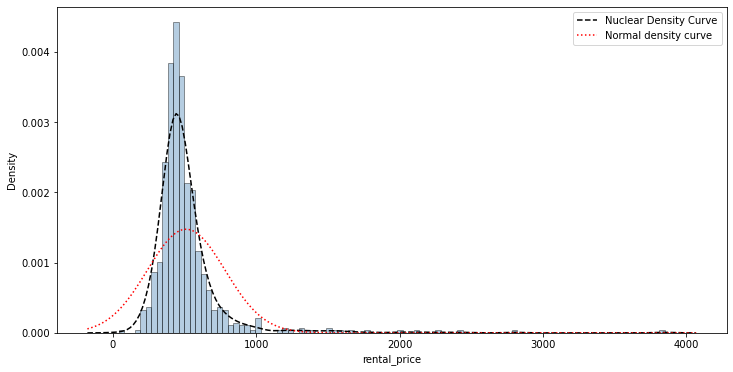

In [59]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 6))
sns.distplot(a=suburb.rental_price, bins=100, fit=stats.norm, norm_hist=True,
             hist_kws={'color':'steelblue', 'edgecolor':'black'},
             kde_kws={'color':'black', 'linestyle':'--', 'label':'Nuclear Density Curve'},
             fit_kws={'color':'red', 'linestyle':':', 'label':'Normal density curve'})

plt.legend()
plt.savefig("../plots/model_normality_hist.jpeg")
plt.show()

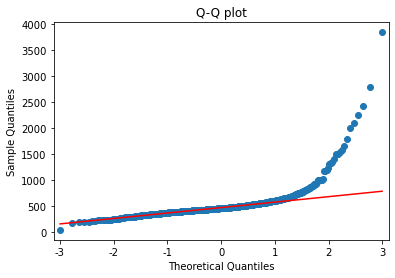

In [60]:
import statsmodels.api as sm

pp_qq_plot = sm.ProbPlot(suburb.rental_price)


pp_qq_plot.qqplot(line='q')
plt.title('Q-Q plot')

plt.savefig("../plots/model_normality_QQ.jpeg")
plt.show()


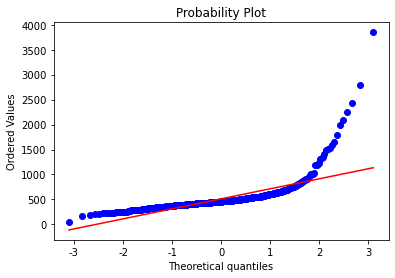

In [44]:
from scipy import stats

plt.rcParams['axes.unicode_minus'] = False

stats.probplot(suburb.rental_price, dist=stats.norm, sparams=(0,1), plot=plt)
plt.show()


In [45]:
import scipy.stats as stats

Shapiro_test = stats.shapiro(suburb.rental_price)
print(Shapiro_test)

ShapiroResult(statistic=0.5534712076187134, pvalue=2.6595551840082855e-39)


In [47]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(suburb.loc[:,['population_density' , 'offence_count_scaled' , 'income',  'num_stations' , 'num_schools','num_hospitals']])

vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF Faxtor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


               features  VIF Faxtor
0                 const   49.344914
1    population_density    1.273798
2  offence_count_scaled    1.065644
3                income    1.245132
4          num_stations    1.438473
5           num_schools    1.426453
6         num_hospitals    1.346024
